## Exploring Customer Segmentation

In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

## Imports

In [73]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import itertools
import warnings

In [74]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
mpl.rcParams.update({"axes.grid": True})

## Data Load and Initial Display

In [75]:
df_in = pd.read_csv("./data/telco_churn_data.csv")

In [76]:
df_in.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [77]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [78]:
df_in.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


## Cleanup

### Specify Columns to Toss

For one reason or another we want to toss these ones

In [79]:
# These columns have many nulls
drop_columns = df_in.loc[
    :, df_in.isnull().sum() / df_in.isnull().count() * 100.0 > 10.0
].columns.to_list()

display(drop_columns)

# These columns are representations of other columns or otherwise unneeded
drop_columns += [
    "Under 30",
    "Senior Citizen",
    "Dependents",
    "City",
    "Latitude",
    "Longitude",
    "Population",
    "Customer ID",
    "Zip Code",
]

display(drop_columns)

['Offer',
 'Internet Type',
 'Churn Category',
 'Churn Reason',
 'Customer Satisfaction']

['Offer',
 'Internet Type',
 'Churn Category',
 'Churn Reason',
 'Customer Satisfaction',
 'Under 30',
 'Senior Citizen',
 'Dependents',
 'City',
 'Latitude',
 'Longitude',
 'Population',
 'Customer ID',
 'Zip Code']

### Various Columns That Are Functions of Other Columns

Can we (should we) remove these multiplicative products

In [80]:
# Show that total total long distance is average long distance x num months
if 0:
    display(
        pd.DataFrame(
            {
                "Actual": df_in["Total Long Distance Charges"],
                "Assertion": df_in["Avg Monthly Long Distance Charges"]
                * df_in["Tenure in Months"],
            }
        )
    )

In [81]:
# drop_columns.append("Avg Monthly Long Distance Charges")

In [82]:
# Show that monthly charge approximately equals average total regular charges
if 0:
    plt.scatter(
        df_in["Monthly Charge"],
        df_in["Total Regular Charges"] / df_in["Tenure in Months"],
        color="blue",
    )

In [83]:
drop_columns.append("Monthly Charge")

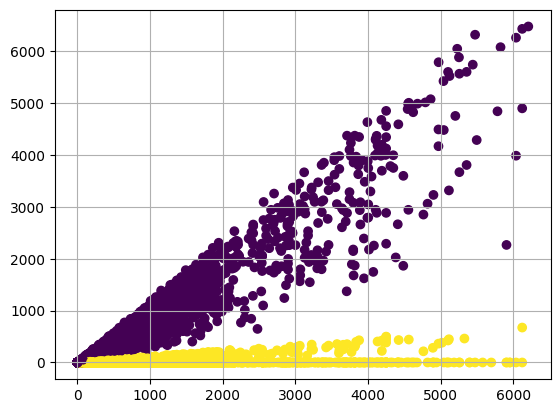

In [84]:
# Show that total extra data charges is proportional to Total GB Download when unlimited data is false
df_in["Total GB Download"] = (
    df_in["Avg Monthly GB Download"] * df_in["Tenure in Months"]
)

plt.scatter(
    df_in["Total GB Download"],
    df_in["Total Extra Data Charges"],
    c=df_in["Unlimited Data"] == "Yes",
)

In [85]:
drop_columns.append("Avg Monthly GB Download")

In [86]:
# Show that the total refunds category is pretty much insignificant
if 0:
    sns.displot(
        df_in,
        x="Total Refunds",
        kde=True,
        fill=True,
    )

    plt.scatter(
        df_in["Total Refunds"],
        df_in["Total Regular Charges"],
        c=df_in["Churn Value"],
    )

In [87]:
drop_columns.append("Total Refunds")

### Perform the Cleanup

In [88]:
def cat_str_to_idx(series: pd.Series) -> pd.Series:
    if series.dtype == "object" and 1:
        return pd.Series(np.unique(series, return_inverse=True)[1])
    return series


df = df_in.drop(columns=drop_columns).apply(cat_str_to_idx)
assert np.all(df.isnull().sum() == 0), "Some Nulls Remain"
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Online Security                    7043 non-null   int64  
 8   Online Backup                      7043 non-null   int64  
 9   Device Protection Plan             7043 non-null   int64  
 10  Premium Tech Support               7043 non-null   int64  
 11  Streaming TV                       7043 non-null   int64

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Total Regular Charges,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Married,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Total GB Download
0,0,0,1,0,0.00,0,1,0,0,1,0,0,1,0,0,0,1,0,39.65,0.0,0.00,1,78,0,0,1,5433,5,0,9
1,1,1,8,1,48.85,1,1,0,1,0,0,0,0,0,0,0,1,1,633.30,120.0,390.80,0,74,1,1,1,5302,5,0,152
2,0,0,18,1,11.33,1,1,0,0,0,0,1,1,1,1,0,1,0,1752.55,0.0,203.94,1,71,0,3,1,3179,1,0,1026
3,1,1,25,1,19.76,0,1,0,1,1,0,1,1,0,0,0,1,0,2514.50,327.0,494.00,0,78,1,1,1,5337,1,1,325
4,1,1,37,1,6.33,1,1,0,0,0,0,0,0,0,0,0,1,0,2868.15,430.0,234.21,0,80,1,1,1,2793,1,0,555


## PCA Prep

### Select Numeric Columns

Those columns where data type is not object

In [89]:
df_numeric = df[df.columns[df.dtypes != "object"]]
display(df_numeric.head())
display(df_numeric.shape)

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Total Regular Charges,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Married,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Total GB Download
0,0,0,1,0,0.00,0,1,0,0,1,0,0,1,0,0,0,1,0,39.65,0.0,0.00,1,78,0,0,1,5433,5,0,9
1,1,1,8,1,48.85,1,1,0,1,0,0,0,0,0,0,0,1,1,633.30,120.0,390.80,0,74,1,1,1,5302,5,0,152
2,0,0,18,1,11.33,1,1,0,0,0,0,1,1,1,1,0,1,0,1752.55,0.0,203.94,1,71,0,3,1,3179,1,0,1026
3,1,1,25,1,19.76,0,1,0,1,1,0,1,1,0,0,0,1,0,2514.50,327.0,494.00,0,78,1,1,1,5337,1,1,325
4,1,1,37,1,6.33,1,1,0,0,0,0,0,0,0,0,0,1,0,2868.15,430.0,234.21,0,80,1,1,1,2793,1,0,555


(7043, 30)

### Selectively Choose Columns Rather Than Selectively Drop

In [90]:
columns = [
    "Tenure in Months",
    "Age",
    "Total Regular Charges",
    "Churn Value",
    "Unlimited Data",
]
df_numeric = df[columns]
display(df_numeric.head())
display(df_numeric.shape)

,Tenure in Months,Age,Total Regular Charges,Churn Value,Unlimited Data
0,1,78,39.65,1,0
1,8,74,633.30,1,0
2,18,71,1752.55,1,1
3,25,78,2514.50,1,0
4,37,80,2868.15,1,0


(7043, 5)

### Scale

In [91]:
df_scaled = (df_numeric - df_numeric.mean()) / df_numeric.std()
display(df_scaled.head())

,Tenure in Months,Age,Total Regular Charges,Churn Value,Unlimited Data
0,-1.278897,1.879977,-0.988753,1.66371,-0.789365
1,-0.993672,1.641176,-0.726797,1.66371,-0.789365
2,-0.586209,1.462075,-0.232913,1.66371,1.266662
3,-0.300984,1.879977,0.103308,1.66371,-0.789365
4,0.187973,1.999377,0.259361,1.66371,-0.789365


## EV vs. Chosen Columns Analysis

Looking for Combinations with High Cumulative EV With 3 Components

### Define the Allowable Combinations

In [92]:
# inds = list(range(df_scaled.shape[1]))
# choosek = 4
# combos = list(itertools.combinations(inds, choosek))
# print(
#     "Checking %d of combinations of choosing %d from %d"
#     % (len(combos), choosek, len(inds))
# )

### Cumulative EV vs. Num Components

In [93]:
# cum_ev_combos = []
# n_components = 3

# for m in range(len(combos)):
#     combo = list(combos[m])
#     cum_ev = (
#         PCA(n_components=choosek, random_state=123)
#         .fit(df_scaled.iloc[:, combo])
#         .explained_variance_ratio_
#         * 100.0
#     ).cumsum()

#     cum_ev_combos.append(cum_ev[ncomp - 1])
#     if m % 1000 == 0:
#         display([m, combo, cum_ev_combos[-1]])

### Plot Cumulative EV at 3 Components vs. Combination Index

In [94]:
# sorted_inds = np.argsort(cum_ev_combos)[::-1]
# plt.scatter(range(len(combos)), np.array(cum_ev_combos)[sorted_inds], color="blue")

# for ind in range(10):
#     m = sorted_inds[ind]
#     combo = list(combos[m])
#     combo_columns = df_scaled.columns[combo]
#     display([m, cum_ev_combos[m], combo_columns])

### Choose the Top Combination

The one with the highest EV @ 3 components

In [95]:
# df_scaled = df_scaled.iloc[:, list(combos[sorted_inds[4]])]

## PCA

#### Cumulative EV

In [96]:
ev = (
    PCA(n_components=df_scaled.shape[1], random_state=123)
    .fit(df_scaled)
    .explained_variance_ratio_
    * 100.0
)
cum_ev = ev.cumsum()

#### Plot Cumulative EV

[None, None, None]

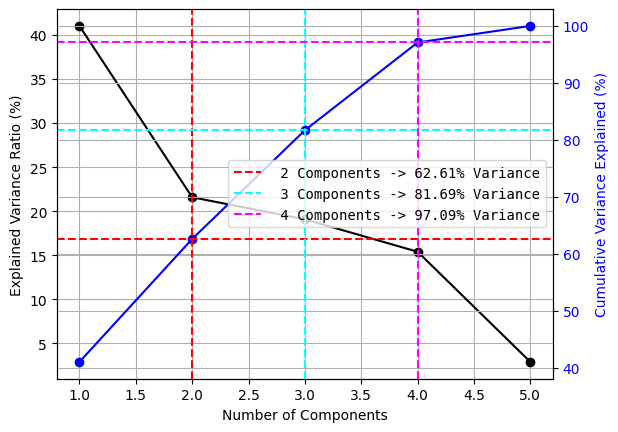

In [97]:
fig, ax1 = plt.subplots()

ax1_color = "black"
ax1.plot(
    np.arange(len(ev)) + 1,
    ev,
    linestyle="solid",
    marker="o",
    color=ax1_color,
)

ax1.set_xlabel("Number of Components")
ax1.set_ylabel("Explained Variance Ratio (%)", color=ax1_color)

ax2_color = "blue"
ax2 = ax1.twinx()
ax2.plot(
    np.arange(len(cum_ev)) + 1,
    cum_ev,
    linestyle="solid",
    marker="o",
    color=ax2_color,
)

ax2.set_ylabel("Cumulative Variance Explained (%)", color=ax2_color)
ax2.tick_params(axis="y", labelcolor=ax2_color)


def crosshairs_at(
    target_cev: float = 0.0, ncomp: int = None, color: str = "", linestyle: str = "--"
):
    if ncomp is None:
        ncomp = PCA(n_components=target_cev / 100.0).fit(df_scaled).n_components_

    label = "%2d Components -> %.2f%% Variance" % (ncomp, cum_ev[ncomp - 1])
    ax2.axhline(cum_ev[ncomp - 1], color=color, linestyle=linestyle)
    ax2.axvline(ncomp, label=label, color=color, linestyle=linestyle)


crosshairs_at(ncomp=2, color="red")
crosshairs_at(ncomp=3, color="cyan")
crosshairs_at(ncomp=4, color="magenta")
# crosshairs_at(target_cev=95.0, color="blue")

plt.setp(plt.legend(loc="center right", fancybox=True).texts, family="monospace")

### Fit

For simplicity just go with 3 components for PCA

In [98]:
n_components = 3
df_pca = pd.DataFrame(
    PCA(n_components=n_components, random_state=123).fit_transform(df_scaled),
    columns=["Component" + str(k + 1) for k in range(n_components)],
)
df_pca = (df_pca - df_pca.mean()) / df_pca.std()  # standardize after PCA ? maybe ?
df_pca.head()

,Component1,Component2,Component3
0,-1.554890,2.003076,0.445030
1,-1.314323,1.858799,0.585034
2,-0.559207,2.028353,-1.135586
3,-0.639438,2.220582,0.936119
4,-0.351661,2.362328,1.107078


## Clustering with KMeans

### Parameter Search

#### Search Over Number of Clusters

In [99]:
n_clusters_list = np.arange(2, 10)
display(n_clusters_list)
inertia = []

for n_clusters in n_clusters_list:
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=123).fit(df_pca)
    (_, counts) = np.unique(kmeans.labels_, return_counts=True)
    display([n_clusters, kmeans.inertia_, counts])
    inertia.append(kmeans.inertia_)

array([2, 3, 4, 5, 6, 7, 8, 9])

[2, 14441.288396851487, array([2704, 4339])]

[3, 11318.40302366505, array([2505, 1707, 2831])]

[4, 9671.155048136778, array([1426, 1817, 2522, 1278])]

[5, 6744.068194470859, array([1351, 1227, 1934, 1346, 1185])]

[6, 5664.666806764935, array([ 879, 1295, 1836, 1062,  763, 1208])]

[7, 4910.398181023029, array([ 879, 1166, 1113, 1062,  763, 1290,  770])]

[8, 4300.632465412458, array([ 658,  745, 1600,  571, 1058,  692,  936,  783])]

[9,
 3708.670643615769,
 array([ 658, 1232,  832,  571,  705,  692,  701,  783,  869])]

#### Plot Inertia vs. Num Clusters

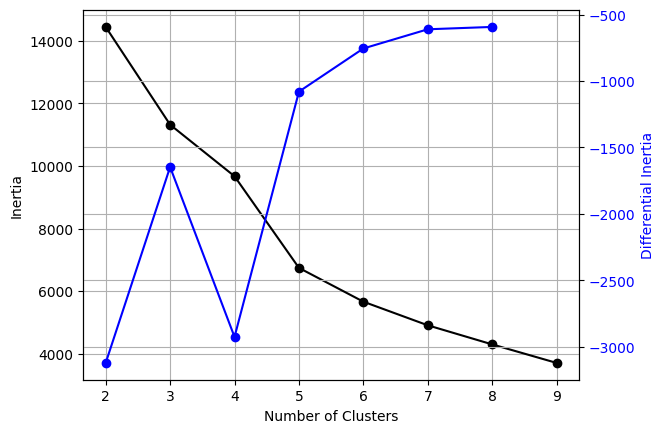

In [100]:
fig, ax1 = plt.subplots()

# Inertia vs. Num Clusters
ax1_color = "black"
ax1.plot(
    n_clusters_list,
    inertia,
    linestyle="solid",
    marker="o",
    color=ax1_color,
)

ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia")

# Differential Inertia vs. Num Clusters
ax2_color = "blue"
ax2 = ax1.twinx()
ax2.plot(
    n_clusters_list[:-1],
    np.diff(inertia),
    linestyle="solid",
    marker="o",
    color=ax2_color,
)

ax2.set_ylabel("Differential Inertia", color=ax2_color)
ax2.tick_params(axis="y", labelcolor=ax2_color)

#### Conclusion

5 clusters is good enough, after that the improvement decelerates

### Cluster

In [112]:
kmeans = cluster.KMeans(n_clusters=5, random_state=123).fit(df_pca)

(unique_labels, counts) = np.unique(kmeans.labels_, return_counts=True)
display([unique_labels, counts, kmeans.inertia_])

[array([0, 1, 2, 3, 4], dtype=int32),
 array([1351, 1227, 1934, 1346, 1185]),
 6744.068194470859]

### Label Data

In [102]:
df_labeled = df_pca.join(pd.DataFrame({"kmeans": kmeans.labels_}))
display(df_labeled.head())
display(df_labeled.groupby("kmeans").count().reset_index())

,Component1,Component2,Component3,kmeans
0,-1.554890,2.003076,0.445030,1
1,-1.314323,1.858799,0.585034,1
2,-0.559207,2.028353,-1.135586,3
3,-0.639438,2.220582,0.936119,1
4,-0.351661,2.362328,1.107078,1


,kmeans,Component1,Component2,Component3
0,0,1426,1426,1426
1,1,1817,1817,1817
2,2,2522,2522,2522
3,3,1278,1278,1278


### Scatter Plot Helper Function

In [103]:
def df_scatter_3d(
    data_frame: pd.DataFrame = None,
    color: str = None,
):
    px.scatter_3d(
        data_frame=data_frame,
        x=data_frame.columns[0],
        y=data_frame.columns[1],
        z=data_frame.columns[2],
        color=color,
    ).update_layout(autosize=False, width=600, height=600).show()

### Scatter Plot

In [104]:
df_scatter_3d(df_labeled, color="kmeans")

### KDE Plot Helper

In [129]:
def df_kde_plots(
    data_frame: pd.DataFrame = None,
    hue: str = None,
):
    fig, ax = plt.subplots(nrows=1, ncols=n_components)
    fig.set_size_inches((14, 6))

    for k in range(n_components):
        sns.kdeplot(
            data_frame,
            x=data_frame.columns[k],
            fill=True,
            hue=hue,
            ax=ax[k],
            palette="bright",
            alpha=0.5,
            linewidth=1,
        )

    fig.suptitle("Density vs. Component Axis")

### KDE Plot

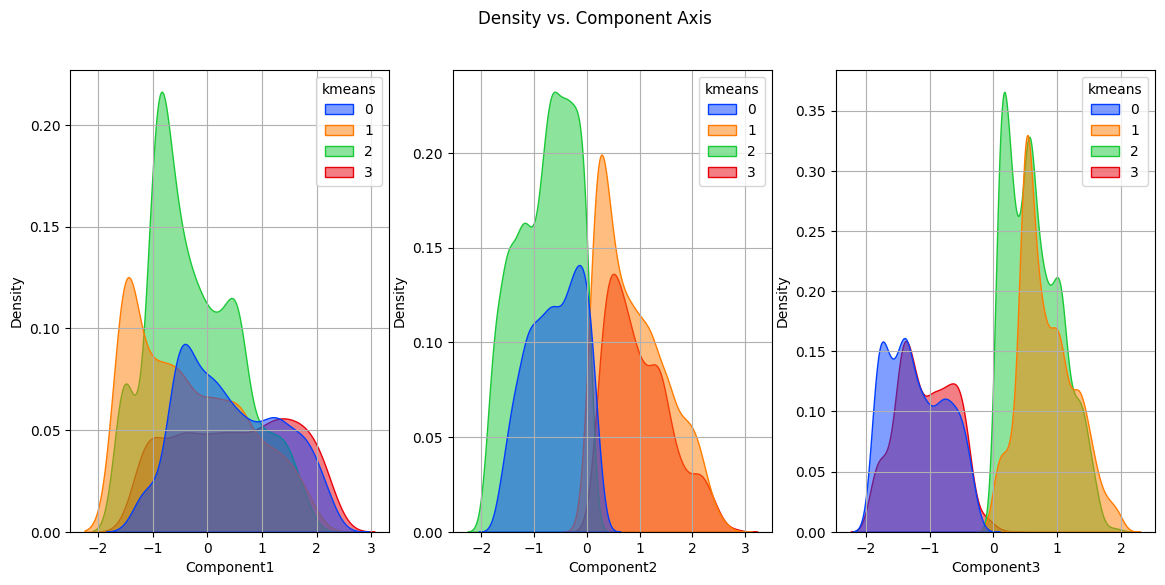

In [131]:
df_kde_plots(data_frame=df_labeled, hue="kmeans")

## Clustering with DBSCAN

### Parameter Search

Search over range of eps and min samples

#### K-Distance Graph

Text(0.5, 0.98, 'K-Distance for 25 Nearest Neighbors')

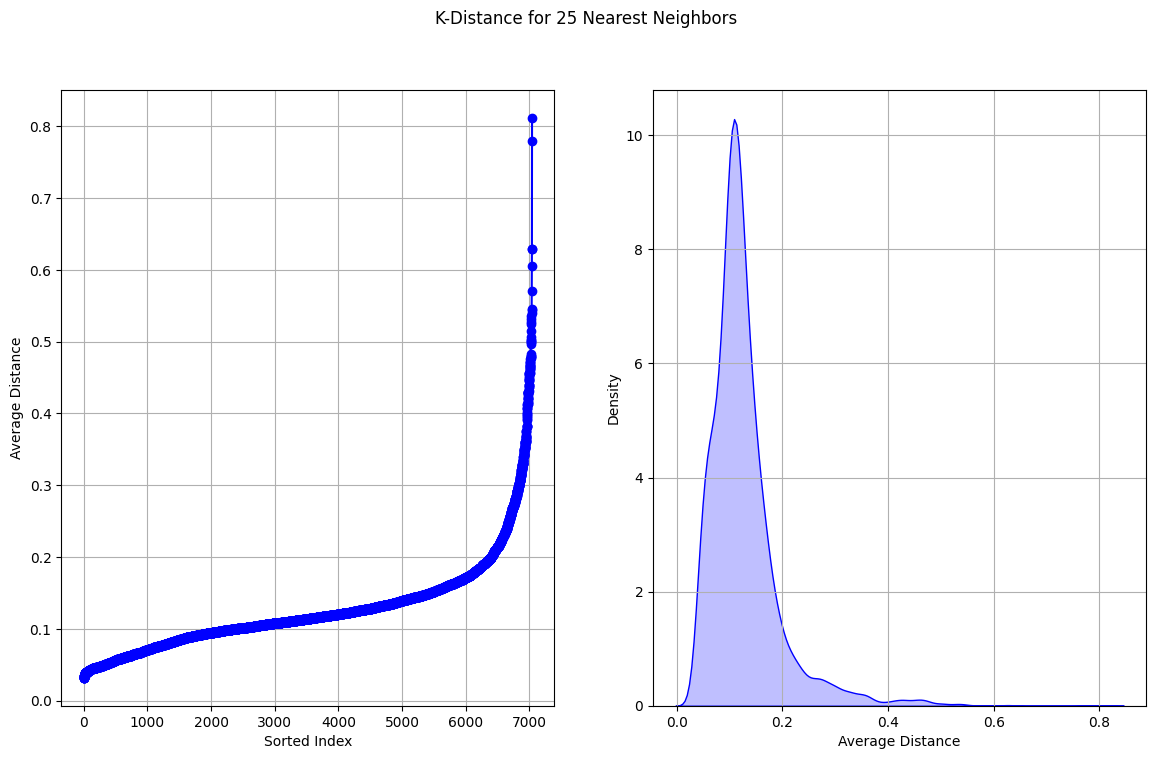

In [120]:
min_samples = 25
distances = np.sort(
    np.mean(
        NearestNeighbors(n_neighbors=min_samples, algorithm="auto")
        .fit(df_pca)
        .kneighbors(df_pca)[0],
        axis=1,
    )
)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((14, 8))


ax[0].plot(
    distances,
    linestyle="solid",
    marker="o",
    color="blue",
)

ax[0].set_xlabel("Sorted Index")
ax[0].set_ylabel("Average Distance")

sns.kdeplot(distances, shade=True, color="blue", ax=ax[1])
ax[1].set_xlabel("Average Distance")

fig.suptitle("K-Distance for %d Nearest Neighbors" % min_samples)

#### Perform the Search

In [126]:
eps_start = 0.4
eps_stop = 0.6
num_eps_points = 21
eps_list = np.linspace(eps_start, eps_stop, num_eps_points, endpoint=True)
display(eps_list)

n_clusters_list = []
n_noise_list = []

# min_samples_list = np.arange(5, 55, 5); eps = 0.5

for eps in eps_list:
    # for min_samples in min_samples_list:
    dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
    n_clusters_list.append(len(np.unique(dbscan.labels_[dbscan.labels_ != -1])))
    n_noise_list.append(np.sum(dbscan.labels_ == -1))

    (unique_labels, counts) = np.unique(dbscan.labels_, return_counts=True)
    null_count = counts[unique_labels == -1][0] if -1 in unique_labels else 0
    null_pct = null_count / len(df_pca) * 100.0
    non_null_pct = counts[unique_labels != -1] / len(df_pca) * 100.0
    num_labels = np.sum(unique_labels != -1)
    if num_labels in [2, 3, 4, 5] and null_pct < 25.0 or 1:
        score = metrics.silhouette_score(df_pca, dbscan.labels_)
        msg = (
            "eps = %.2f, min samples = %d, nulls = %d, %.2f%%, num labels = %d, score = %.2f, label distr = %s"
            % (
                eps,
                min_samples,
                null_count,
                null_pct,
                num_labels,
                score,
                str(np.round(non_null_pct, 1)),
            )
        )
        print(msg)

array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ])

eps = 0.40, min samples = 25, nulls = 170, 2.41%, num labels = 5, score = 0.19, label distr = [18.3  5.4  0.4 31.3 42.2]
eps = 0.41, min samples = 25, nulls = 157, 2.23%, num labels = 5, score = 0.19, label distr = [18.3  5.5  0.5 31.3 42.2]
eps = 0.42, min samples = 25, nulls = 142, 2.02%, num labels = 4, score = 0.21, label distr = [18.6  6.  31.3 42.2]
eps = 0.43, min samples = 25, nulls = 132, 1.87%, num labels = 4, score = 0.21, label distr = [18.7  6.  31.3 42.2]
eps = 0.44, min samples = 25, nulls = 109, 1.55%, num labels = 4, score = 0.21, label distr = [18.8  6.2 31.3 42.2]
eps = 0.45, min samples = 25, nulls = 93, 1.32%, num labels = 4, score = 0.20, label distr = [19.1  6.2 31.3 42.2]
eps = 0.46, min samples = 25, nulls = 90, 1.28%, num labels = 4, score = 0.20, label distr = [19.1  6.2 31.3 42.2]
eps = 0.47, min samples = 25, nulls = 78, 1.11%, num labels = 4, score = 0.20, label distr = [19.2  6.2 31.3 42.2]
eps = 0.48, min samples = 25, nulls = 68, 0.97%, num labels = 4, 

#### Plot Search Results

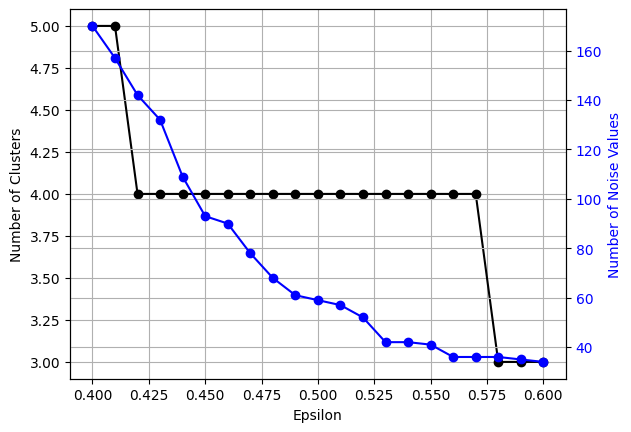

In [123]:
fig, ax1 = plt.subplots()

ax1_color = "black"
ax1.plot(
    eps_list,
    n_clusters_list,
    linestyle="solid",
    marker="o",
    color=ax1_color,
)

ax1.set_xlabel("Epsilon")
ax1.set_ylabel("Number of Clusters")

ax2_color = "blue"
ax2 = ax1.twinx()
ax2.plot(
    eps_list,
    n_noise_list,
    linestyle="solid",
    marker="o",
    color=ax2_color,
)

ax2.set_ylabel("Number of Noise Values", color=ax2_color)
ax2.tick_params(axis="y", labelcolor=ax2_color)

### Cluster

In [124]:
dbscan = cluster.DBSCAN(eps=0.5, min_samples=min_samples).fit(df_pca)
(unique_labels, counts) = np.unique(dbscan.labels_, return_counts=True)
display([unique_labels, counts])

[array([-1,  0,  1,  2,  3]), array([  59, 1369,  441, 2205, 2969])]

### Label Data

In [125]:
df_labeled["dbscan"] = dbscan.labels_
display(df_labeled.head())
display(df_labeled.groupby("dbscan").count().reset_index())
df_scatter_3d(df_labeled.query("dbscan != -1"), color="dbscan")

,Component1,Component2,Component3,kmeans,dbscan
0,-1.554890,2.003076,0.445030,1,0
1,-1.314323,1.858799,0.585034,1,0
2,-0.559207,2.028353,-1.135586,3,1
3,-0.639438,2.220582,0.936119,1,0
4,-0.351661,2.362328,1.107078,1,0


,dbscan,Component1,Component2,Component3,kmeans
0,-1,59,59,59,59
1,0,1369,1369,1369,1369
2,1,441,441,441,441
3,2,2205,2205,2205,2205
4,3,2969,2969,2969,2969


### KDE Plot

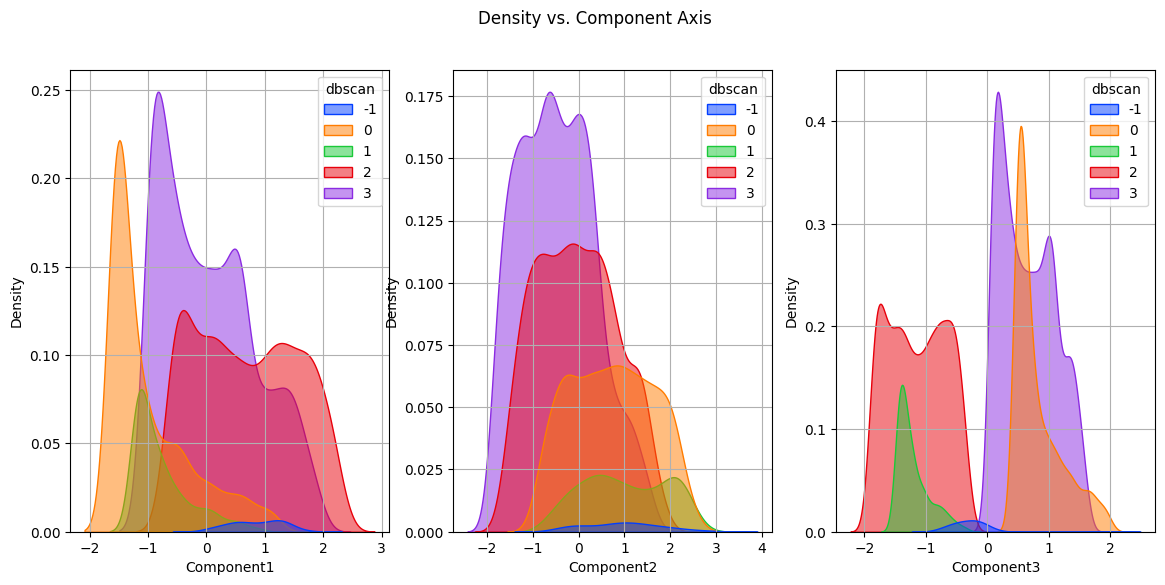

In [140]:
df_kde_plots(data_frame=df_labeled, hue="dbscan")

## Clustering with OPTICS

In [111]:
if 0:
    optics = cluster.OPTICS(min_samples=50).fit(df_pca)
    (unique_labels, counts) = np.unique(optics.labels_, return_counts=True)
    display([unique_labels, counts])
    optics.get_params(deep=True)
    df_labeled["optics"] = optics.labels_
    df_scatter_3d(df_labeled.query("optics != -2"), color="optics")